# More Machine Learning Models

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
# using 'from * import ...' allows as to import submodules directly
from sklearn import (
    datasets,
    model_selection,
    linear_model,
    metrics,
    neighbors,
    tree,
    ensemble,
    svm,
    preprocessing
)



# Downloading Dataset 

In [ ]:
!mkdir ~/.kaggle 
!cp /content/kaggle.json ~/.kaggle 
!chmod 600  ~/.kaggle/kaggle.json
!kaggle datasets download -d mssmartypants/water-quality

  0% 0.00/258k [00:00<?, ?B/s]
100% 258k/258k [00:00<00:00, 64.4MB/s]


In [ ]:
!unzip /content/water-quality.zip

Archive:  /content/water-quality.zip
  inflating: waterQuality1.csv       


# Read the Dataset

In [ ]:
dataset = pd.read_csv('/content/waterQuality1.csv')
dataset

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
# Show the dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
# describe the dataset 
dataset.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [ ]:
# convert string #NUM! to None 
dataset.replace({'#NUM!':np.NaN},inplace=True)
# show information of the dataset 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7996 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
# Drop the missing values
dataset.dropna(inplace=True)

In [ ]:
# Counte the labels 
dataset.is_safe.value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

We can notice that the labels are imbalance.

In [ ]:
# create new dataset the number of 1 equle to numbers of 0
# create new _dataset of ones
new_dataset = dataset[dataset.is_safe=='1']
# append a random samples with same number of ones to the new_dataset
new_dataset = new_dataset.append(dataset[dataset.is_safe=='0'].sample(n=912))

In [ ]:
new_dataset.is_safe.value_counts()

1    912
0    912
Name: is_safe, dtype: int64

In [ ]:
# convert the dtype for the labels to int64
new_dataset.is_safe= new_dataset.is_safe.map(lambda a:int(a))

In [ ]:
# split the dataset to features and target
x = new_dataset.drop(columns=['is_safe'])
y = new_dataset.is_safe



In [ ]:
# Normalize the features 
x_normalize = preprocessing.StandardScaler()
x_norm = x_normalize.fit_transform(x)
x.shape, y.shape

((1824, 20), (1824,))

# KNN 
In statistics, the k-nearest neighbors algorithm is a non-parametric supervised and lazy   learning method first developed by Evelyn Fix and Joseph Hodges in 1951, and later expanded by Thomas Cover.Non-parametric means there is no assumption for underlying data distribution. This will be very helpful in practice where most of the real-world datasets do not follow mathematical theoretical assumptions.
It is used for classification and regression. In both cases, the input consists of the k closest training examples in a data set.

 


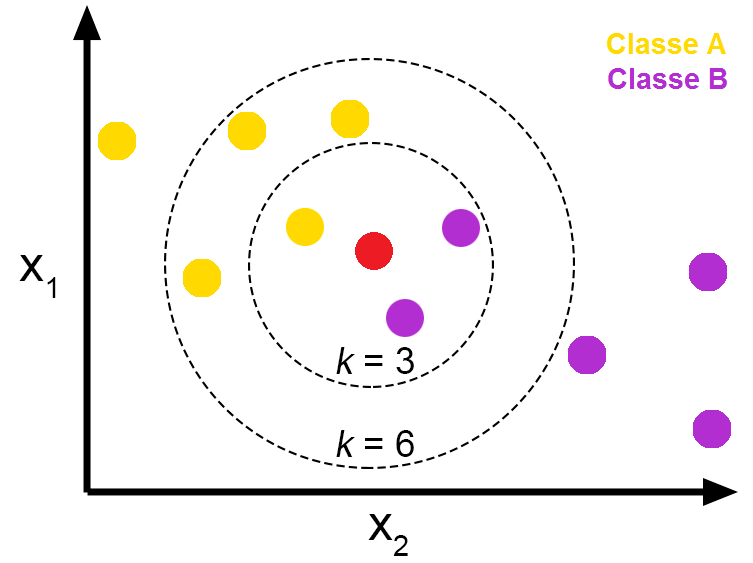


Split the data into 90/10 training/testing split (90% of the data will be used for training while 10% will be used for testing)

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_norm, y, test_size=0.1, random_state=42, stratify=y)

In [ ]:
eigh = neighbors.KNeighborsClassifier(
    n_neighbors=5
)  # initialize the knn model with 5 n_neighbors
# fit the knn on the training dataset 
eigh.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = eigh.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.71      0.77        92
           1       0.75      0.88      0.81        91

    accuracy                           0.79       183
   macro avg       0.80      0.79      0.79       183
weighted avg       0.80      0.79      0.79       183



# Tree

## Decision Tree
### Decision Tree Algorithm
 
The supervised learning algorithms family includes the decision tree algorithm. The decision tree technique, in contrast to other supervised learning methods, is capable of handling both classification and regression challenges.

By learning straightforward decision rules based on existing data, a Decision Tree is used to build a training model that can be utilized to predict the class or value of the target variable.

In decision trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

 

###Types of Decision Trees
 
Depending on the kind of target variable we have, several decision trees can be used. It comes in two varieties:

1. Categorical Variable Decision Tree: This type of decision tree is known as a category variable decision tree because it has a categorical target variable.

2. Continuous Variable Decision Tree: This type of decision tree refers to a target variable that is continuously changing.

Split the data into 90/10 training/testing split (90% of the data will be used for training while 10% will be used for testing)

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, test_size=0.1, random_state=42, stratify=y
)

### Modeling 

In [ ]:
# Create the Decision Tree Classifier
clf = tree.DecisionTreeClassifier()
# train the model 
clf.fit(x_train, y_train)

DecisionTreeClassifier()

### Model Evaluation 

In [ ]:
y_pred = clf.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        92
           1       0.95      0.89      0.92        91

    accuracy                           0.92       183
   macro avg       0.93      0.92      0.92       183
weighted avg       0.93      0.92      0.92       183



### Plot the Tree

[Text(0.6483585858585859, 0.9642857142857143, 'X[0] <= 0.215\ngini = 0.5\nsamples = 1641\nvalue = [820, 821]'),
 Text(0.38762626262626265, 0.8928571428571429, 'X[19] <= 0.035\ngini = 0.362\nsamples = 860\nvalue = [656, 204]'),
 Text(0.23484848484848486, 0.8214285714285714, 'X[5] <= 0.765\ngini = 0.453\nsamples = 404\nvalue = [264, 140]'),
 Text(0.16161616161616163, 0.75, 'X[13] <= 1.005\ngini = 0.335\nsamples = 249\nvalue = [196, 53]'),
 Text(0.13636363636363635, 0.6785714285714286, 'X[10] <= 0.008\ngini = 0.47\nsamples = 127\nvalue = [79, 48]'),
 Text(0.12626262626262627, 0.6071428571428571, 'X[9] <= 0.115\ngini = 0.483\nsamples = 81\nvalue = [33, 48]'),
 Text(0.11616161616161616, 0.5357142857142857, 'X[12] <= 14.69\ngini = 0.423\nsamples = 69\nvalue = [21, 48]'),
 Text(0.09595959595959595, 0.4642857142857143, 'X[16] <= 4.915\ngini = 0.354\nsamples = 61\nvalue = [14, 47]'),
 Text(0.08585858585858586, 0.39285714285714285, 'X[11] <= 0.156\ngini = 0.289\nsamples = 57\nvalue = [10, 47]'),

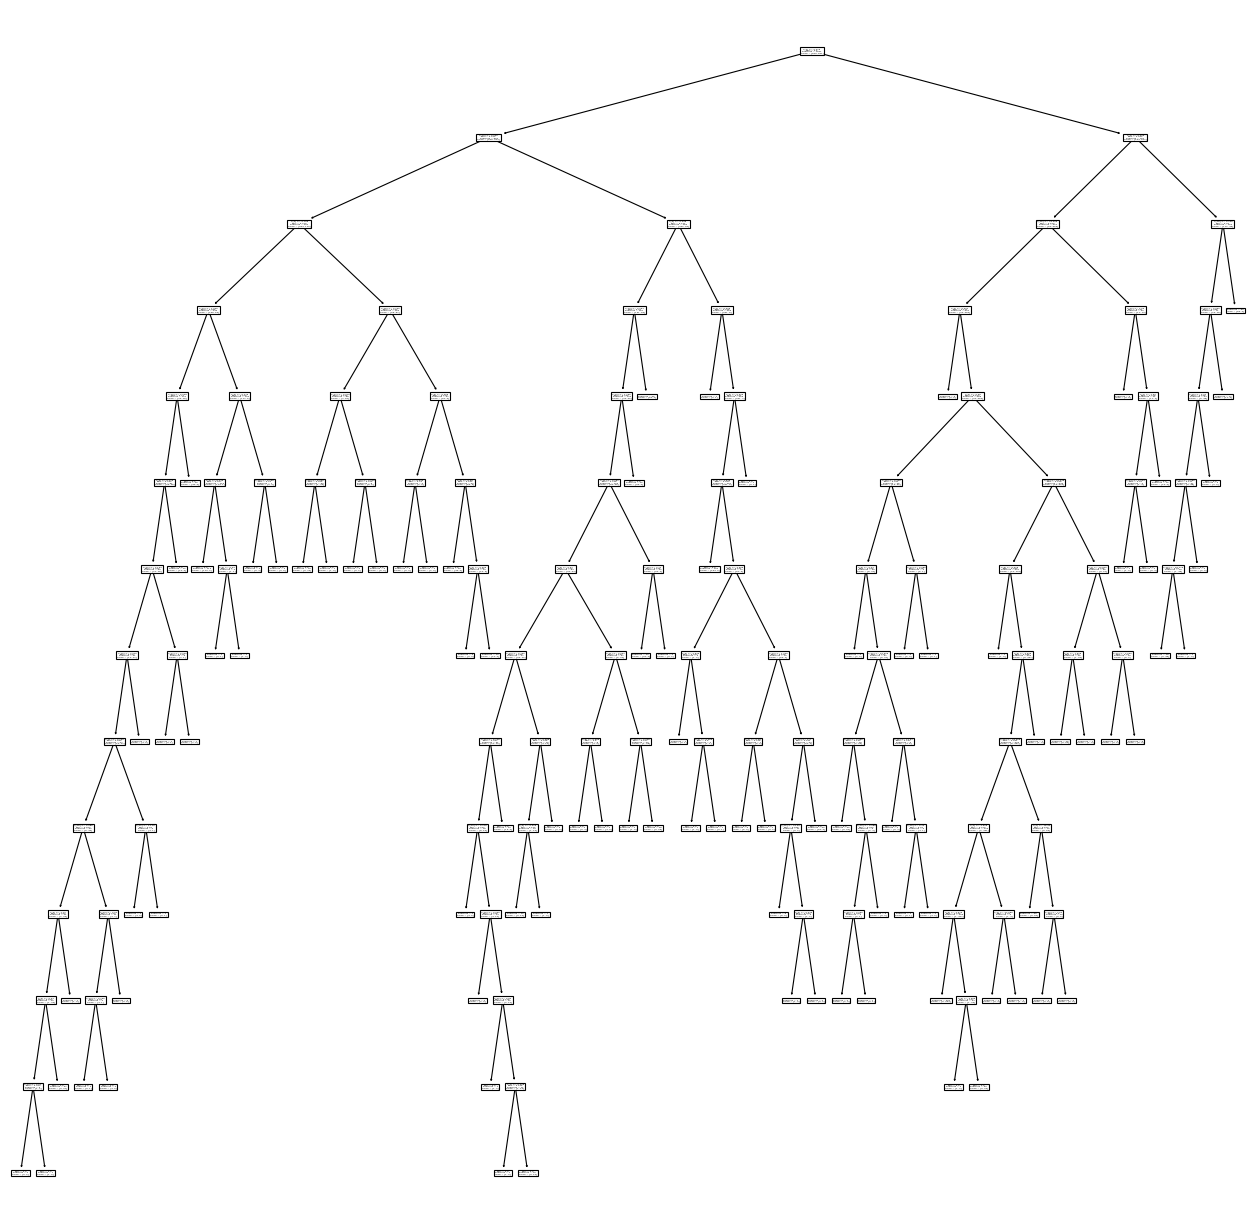

In [ ]:

plt.figure(figsize=(20, 20), dpi=80)
tree.plot_tree(clf)

# Ensemble Learning and Random Forests


Suppose you pose a complex question to thousands of random people, then aggregate
their answers. In many cases you will find that this aggregated answer is better than
an expert’s answer. This is called the wisdom of the crowd. Similarly, if you aggregate
the predictions of a group of predictors (such as classifiers or regressors), you will
often get better predictions than with the best individual predictor. A group of pre‐
dictors is called an ensemble; thus, this technique is called Ensemble Learning, and an
Ensemble Learning algorithm is called an Ensemble method.




As an example of an Ensemble method, you can train a group of Decision Tree classi‐
fiers, each on a different random subset of the training set. To make predictions, you
obtain the predictions of all the individual trees, then predict the class that gets the
most votes. Such an ensemble of Decision Trees is
called a Random Forest, and despite its simplicity, this is one of the most powerful
Machine Learning algorithms available today

## Random Forest
A popular supervised machine learning technique for solving classification and regression issues is random forest. It produces decision trees from several data, utilizing the majority vote for classification and the average for regression.


The Random Forest Algorithm's ability to handle data sets with both continuous and categorical variables, as in classification and regression challenges, is one of its most crucial features. It gets improved result for classification challenges.

### How Random Forest Work

teps involved in random forest algorithm:

Step 1: In Random forest n number of random records are taken from the data set having k number of records.

Step 2: Individual decision trees are constructed for each sample.

Step 3: Each decision tree will generate an output.

Step 4: Final output is considered based on Majority Voting or Averaging for Classification and regression respectively.

For example:  consider the fruit basket as the data as shown in the figure below. Now n number of samples are taken from the fruit basket and an individual decision tree is constructed for each sample. Each decision tree will generate an output as shown in the figure. The final output is considered based on majority voting. In the below figure you can see that the majority decision tree gives output as an apple when compared to a banana, so the final output is taken as an apple.

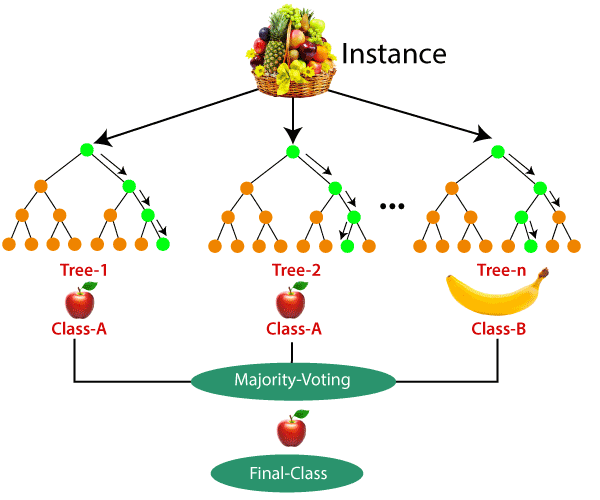

### Difference Between Decision Tree & Random Forest

Random forest is a collection of decision trees; still, there are a lot of differences in their behavior.

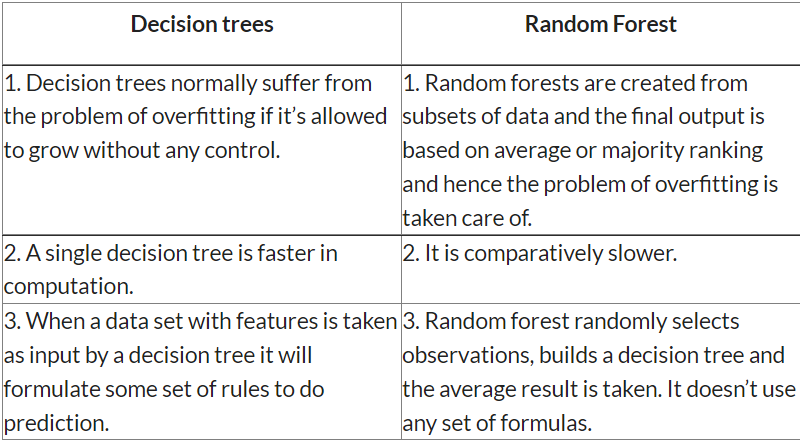


### Let's Create & Train Random Forest

### Important Hyperparameters

**n_estimatorsint:** the number of trees in the forest.

**max_depthint:** the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**oob_scorebool:** whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.

**n_jobs:** it tells the engine how many processors it is allowed to use. If the value is 1, it can use only one processor but if the value is -1 there is no limit.


In [ ]:
# initializes  the random forest classifier with 100 trees and max depth of 10
clf = ensemble.RandomForestClassifier(
    random_state=42, n_jobs=-1, max_depth=10, n_estimators=100,
)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
y_pred = clf.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        92
           1       0.93      0.91      0.92        91

    accuracy                           0.92       183
   macro avg       0.92      0.92      0.92       183
weighted avg       0.92      0.92      0.92       183



# Support Vector Machine


A Support Vector Machine (SVM) is a powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection. It is one of the most popular models in Machine Learning, and anyone interested in Machine Learning should have it in their toolbox. SVMs are particularly well suited for classification of complex small- or medium-sized datasets.



Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

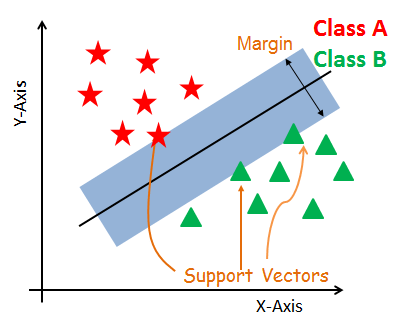





### How does SVM work?
The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:

1.Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

2.Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure.
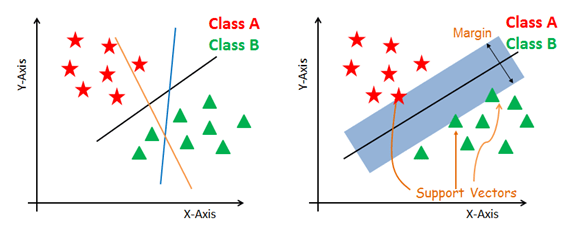



### Support Vectors
Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

### Hyperplane
A hyperplane is a decision plane which separates between a set of objects having different class memberships.

### Margin
A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.



## SVM Kernels
The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier.

### Linear Kernel 
A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.

`K(x, xi) = sum(x * xi)`

### Polynomial Kernel 
A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.

`K(x,xi) = 1 + sum(x * xi)^d`

Where d is the degree of the polynomial. d=1 is similar to the linear transformation. The degree needs to be manually specified in the learning algorithm.

### Radial Basis Function Kernel 
The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.


`K(x,xi) = exp(-gamma * sum((x – xi^2))`

Here gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma=0.1 is considered to be a good default value. The value of gamma needs to be manually specified in the learning algorithm.



## Tuning Hyperparameters

**Kernel**: The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.

**Regularization**: Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.

**Gamma**: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.


We can summarize the effect of $C$ and $\gamma$ in the following table

|         | Large Gamma           | Small Gamma | Large C           | Small C  |
| ------------- |:-------------:| -----:| -----:| -----:|
| Variance      | Low | High | High | Low | 
| Bias      | High      |   Low | Low | High | 

As a reminder, this is what the bias and variance look like

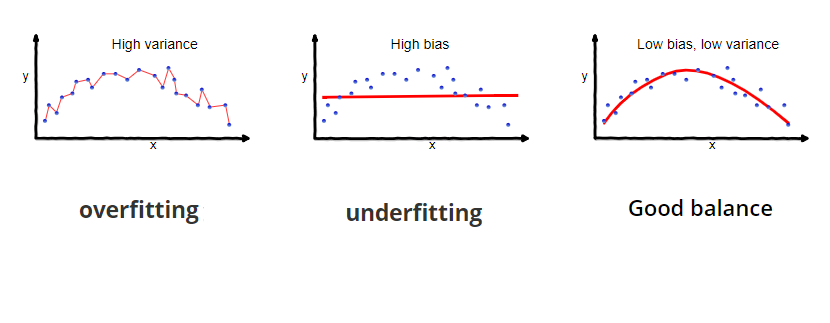



#### Splitting Data


In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_norm, y, test_size=0.1, random_state=42, stratify=y)

#### Creating Model 

In [ ]:

# Create a svm Classifier
model = svm.SVC(kernel="rbf")  # rbf Kernel


# Train the model using the training sets
model.fit(x_train, y_train)



SVC()

In [ ]:
# Predict the response for test dataset
y_pred = model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71        92
           1       0.70      0.78      0.74        91

    accuracy                           0.73       183
   macro avg       0.73      0.73      0.73       183
weighted avg       0.73      0.73      0.73       183

